# Importing new libraries for visualizations

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Orders and Products merged dataset with new columns and flags

In [2]:
path=r'C:\Users\LENOVO\Desktop\CF - Data Analytics\Achievement 5\Achievement 5 - PROJECT'

# Assigning location of dataset to a variable

In [3]:
df_ORDS_PRODS_MERGE=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_newflags.pkl'))

# Importing pickle file which has Orders and Products Merged dataset

# Creating Bar Charts

<AxesSubplot:>

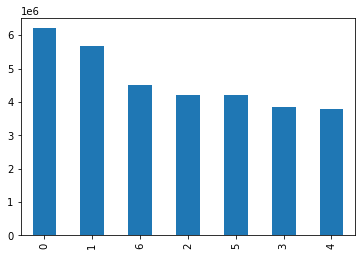

In [8]:
df_ORDS_PRODS_MERGE['orders_day_of_week'].value_counts().plot.bar()

# Creating a bar chart

<AxesSubplot:>

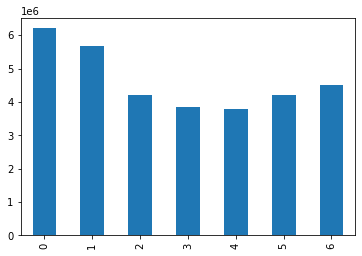

In [6]:
df_ORDS_PRODS_MERGE['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Creating a bar chart with sort_index() - bars will be sorted according to their index numbers

<AxesSubplot:>

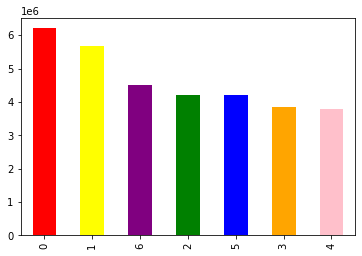

In [10]:
df_ORDS_PRODS_MERGE['orders_day_of_week'].value_counts().plot.bar(color=['red', 'yellow', 'purple', 'green', 'blue', 'orange', 'pink'])

# Creating a bar chart with COLOR argument in bar()

# Exporting Bar Charts

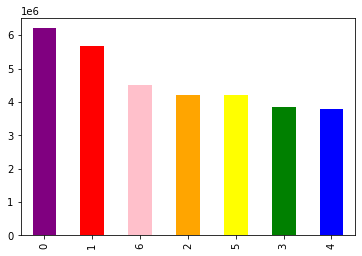

In [11]:
bar = df_ORDS_PRODS_MERGE['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Assigning bar chart creation to a variable in order to save it in Jupyter

In [13]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Exporting bar charts to local folder

# Creating Histograms

In [20]:
df_ORDS_PRODS_MERGE['prices'].median()

7.4

In [25]:
df_ORDS_PRODS_MERGE['prices'].describe()

# Check the descriptive statistics of the merged ORDER-PRODUCT dataframe

count    3.239973e+07
mean              NaN
std      0.000000e+00
min      1.000000e+00
25%      4.199219e+00
50%      7.398438e+00
75%      1.129688e+01
max      2.500000e+01
Name: prices, dtype: float64

In [23]:
df_ORDS_PRODS_MERGE.loc[df_ORDS_PRODS_MERGE['prices'] >100, 'prices'] = np.nan

# Marks the price values above 100 as MISSING(NaN) - Data Consistency Check

In [38]:
df_ORDS_PRODS_MERGE.loc[df_ORDS_PRODS_MERGE['prices'] > 100]

# To check if there are prices with value above 100

,order_id,user_id,order_number,orders_day_of_week,ordered_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,Busiest Day,Busiest DAYS,Busiest_Period_of_Day,Max_Order,loyalty_flag,Average_Spend,Spend_Flag,Visit_Frequency,Frequency_Flag


<AxesSubplot:ylabel='Frequency'>

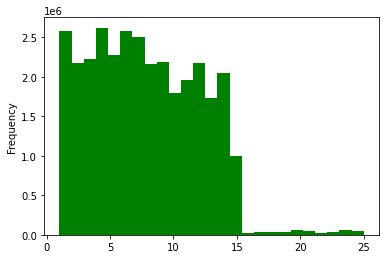

In [51]:
df_ORDS_PRODS_MERGE['prices'].plot.hist(bins=25, color=['green'])

# Plotting a histogram for the column 'prices'

<AxesSubplot:ylabel='Frequency'>

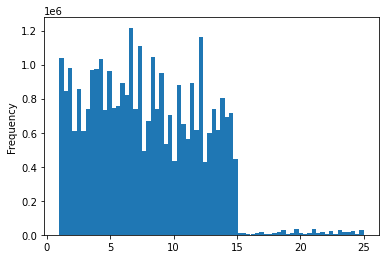

In [49]:
df_ORDS_PRODS_MERGE['prices'].plot.hist(bins=70)

# Increased the granularity for histogram, bins = 70

<AxesSubplot:xlabel='prices', ylabel='prices'>

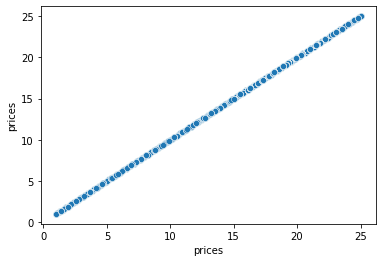

In [29]:
sns.scatterplot(x='prices', y='prices', data=df_ORDS_PRODS_MERGE)

# Plotting a scatterplot graph for the variable 'prices'

# Exporting Histogram Chart

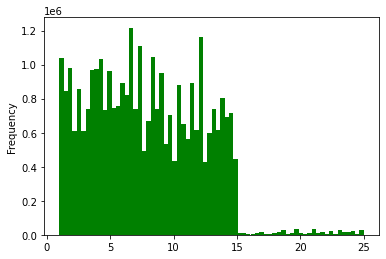

In [52]:
hist = df_ORDS_PRODS_MERGE['prices'].plot.hist(bins=70, color=['green'])

# Assigning histogram creation to a variable in order to save it in Jupyter

In [53]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

# Exporting histogram to local folder

# Creating Line Graphs

In [4]:
np.random.seed(4)

# Setting the seed

In [6]:
dev = np.random.rand(len(df_ORDS_PRODS_MERGE)) <= 0.7

# Create a list holding TRUE/FALSE values to the test np.random.rand() <= 0.7

In [7]:
big = df_ORDS_PRODS_MERGE[dev]

# All values <= 0.7 are stored in the dataframe 'big' (TRUE values)
# Stores 70% of the sample in the dataframe 'big'

In [9]:
small = df_ORDS_PRODS_MERGE[~dev]

# All values > 0.7 are stored in the dataframe 'small' (FALSE values)
# Stores 30% of the sample in the dataframe 'small'

In [10]:
len(df_ORDS_PRODS_MERGE)

# Checking the number rows in Orders and Products Merged dataset

32404859

In [44]:
len(big)+len(small)

# Checking the number of rows in big and small dataframes

32404859

In [12]:
df_2 = small[['orders_day_of_week', 'prices']]

# New dataframe 'df_2' is created and it contains only 'orders_day_of_week' and 'prices' columsn from 'small' subset

In [42]:
df_2.max()

# Checking the maximum values present in dataframe df_2

orders_day_of_week     6.0
prices                25.0
dtype: float64

In [40]:
df_2.loc[df_2['prices'] > 100]

# To check if there are prices with value above 100 in df_2

,orders_day_of_week,prices


In [39]:
df_2.loc[df_2['prices'] >100, 'prices'] = np.nan

# Marks the price values above 100 as MISSING(NaN) - Data Consistency Check

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


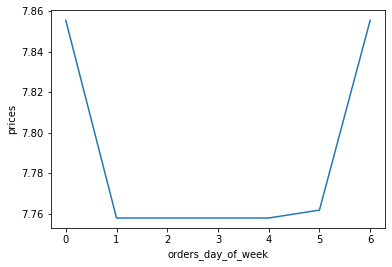

In [45]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y='prices')

# To create line chart for the columns orders_day_of_week' and 'prices'